Phys165 - Fall 2019 <br>
Lab 3 - Possible Asteroid Impact of Earth <br>
Author: "Evan Shipley" <br>
Date: 11/19/2019

In this Lab we will determine if a known Asteroid that has been spotted approaching earth will impact the earth!

The Asteroid's Position and speed have been measure very accurately. But the Asteroids angle (i.e direction), within the the plane of the orbit, is only known to a limited precision.

You are tasked to dermine if the Asteroid is a danger to earth given the measured parameters for initial position and velocity.

The equations that govern the future motion are from Newton's law and the law of gravity:

$\;\;\;\;\; \vec{F}=m\vec{a}=m\ddot{\vec{r}} \;\;\;\;\; \vec{F}_{Grav} = -\frac{GMm}{r^2}\hat{r}=-\frac{GMm}{r^3}\vec{r}$

where $M$ is Earth's mass, $m$ is Asteroid's mass, $r$ is the distance from Earth's center to the asteroid, and $G$ is Newton's gravitational constant.

For our problem, in the plane of the orbit, this becomes a 2-d problem, for which we will use cartesian coordinates (x,y) with the center of the Earth as the origin. Then, using $\vec{r}=x\hat{i}+y\hat{j}$ the vector equations above can be written as:

$\;\;\;\; m(\ddot{x}\hat{i}+\ddot{y}\hat{j})=-\frac{GMm}{(x^2+y^2)^{3/2}}(x\hat{i}+y\hat{j})$ 

or canceling the $m$ on both sides and writing the equations for each vector component,

$\;\;\;\; \ddot{x}=-\frac{GM}{(x^2+y^2)^{3/2}}x$ <br>

$\;\;\;\; \ddot{y}=-\frac{GM}{(x^2+y^2)^{3/2}}y$ <br>

As we did in homework 6 and the class examples, we can break the 2nd oder ODEs into coupled 1st order ODEs. In this case we have 2 coupled 2nd order ODEs to be written as 4 couple 1st order ODEs. Then we implement these in python by using the notation:

$y_1=x$<br>
$y_2=\dot{x} = \dot{y_1}$<br>
$y_3=y$ <br>
$y_4=\dot{y} = \dot{y_3}$<br>

Then the 4 coupled 1st order ODEs are:

$\dot{y_1} = \dot{x}=y_2$ <br>
$\dot{y_2} = \ddot{x} = -\frac{GM}{(x^2+y^2)^{3/2}}x = -\frac{GM}{(y_1^2+y_3^2)^{3/2}}y_1$<br>
$\dot{y_3} = y_4$<br>
$\dot{y_4} = \ddot{y} = -\frac{GM}{(x^2+y^2)^{3/2}}y= -\frac{GM}{(y_1^2+y_3^2)^{3/2}}y_3$<br> 

Putting this in array form for use with odeint in python:

$\;\;\;\; \mathbf{y} = \left[ \begin{array}{c} y_1 \\ y_2 \\y_3 \\y_4 \end{array} \right]
\;\;\;\;\;\;\;\; \frac{d\mathbf{y}}{dt} = \left[ \begin{array}{c} y_2 \\ -\frac{GM}{(y_1^2+y_3^2)^{3/2}}y_1 \\ y_4 \\ -\frac{GM}{(y_1^2+y_3^2)^{3/2}}y_3
\end{array} \right]$

where the second equation for the 1st derivative is what you write as your user function "def F(y,t):" that odeint calls. (see examples from class on ELMS)

For this problem you'll need the physical constants: 

Mass of Earth: $5.972\times 10^{24} kg$ <br>
Radius of Earth: $6.3781\times10^6 m$<br>
Newton's Constant: $G=6.67384\times10^{-11} N m^2/kg^2$ <br>

The measured parameters of the asteroid are:

$X_{initial} = -60\times R_{Earth}$<br>
$Y_{initial} = -80\times R_{Earth}$<br>
Asteroid speed: $|velocity|=1.25\times 10^3 m/s$<br>
Nominal Angle of velocity: $\theta = 60.0^\circ$<br>
Angle Uncertainty: $\sigma_\theta = 0.75^\circ$ <br>

For these problems use time from $0s$ to $5.0\times 10^5s$.

Part 1:
    
Using the nominal paramters (i.e. ignoring $\sigma_\theta$) as the intial parameters use "odeint" to get the trajectory and make the following 2 plots to visually inspect how close it comes to earth.<br>

Plot 1: <br>
a) Plot Distance from earth's center in units of $R_{Earth}$ versus time in units of $Days$ using a log scale for distance (i.e. y-axis)<br>
b) Plot a horizontal line at $R_{Earth}$ for all times for reference.

Plot 2:<br>
a) Make a plot of Y-position versus X-position (both in units of $R_{Earth}$ for all times. <br>
b) Draw a unit circle in the plot (i.e. representing the Earth)

Run the program and look at the output. Notice it approaches very close to the earth! Given the uncertainty in the absolute direction what is the probability it will impact Earth?

Part 2:

Now that we see it will approach close to the earth, we will run a Monte Carlo simulation picking the actual angle at random from a normal distribution using the measured nominal angle and it's uncertainty. For each of these angles set the intial conditions and use "odeint" to get the predicted trajectory. We will count the number of these trajectories that impact the earth compared to the number of total "experiments" to calculate the probabilty of earth impact. 

Specifically, you should:

a) perform enough trials (at least 1000) picking the angle at random as described above to set the initial condition. <br>
b) calculate the trajectory using odeint for each. <br>
c) for each trajectory determine if the asteroid comes within $R_{Earth}$. This is an impact! Count them. <br>
d) For each trajectory that impacts Earth save the time of impact. <br>
e) Calculate and print:<br>
number of trials<br>
number of impacts<br>
Probability of impact: $p = N_{impact}/N_{trials}$<br>
Statistical error of probability: $\sigma_p = \sqrt{N_{trials} p (1-p)} \; / \; N_{trials}$ <br>
For the impacts, The average time of impact in hours<br>
For the impacts, The standard deviation of the times to impact in hours<br>
f) For the impacts, a histogram of the time to impact in hours. <br> 

Some hints:

Make the trials $N_{trials}$ and time increment $dt$ parameters and write your program to use whatever you set at the top of the script. This will allow you to quickly test your program in less time (say using 200-300 trials, and time increments of 10-25s). Then once you have the program you like increase $N_{trials}$ (maybe even 2000-5000) to get a sufficient number of impacts, and decrease $dt$ (maybe to 1s) to get better accuracy.

In your loop for $N_{trials}$ put some code like: 

if (i%100) == 0: <br>
$\;\;\;\;\;$ print(i,' trials') <br>

This will printout the trials you are at every 100 trials so you
can see the progress as it runs for a while.

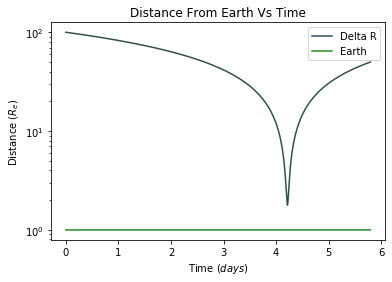

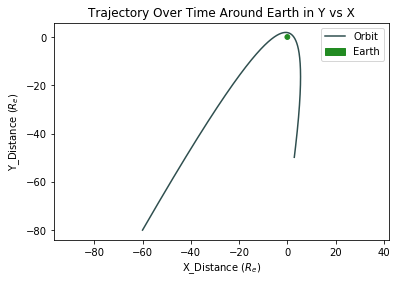

0 trials
1000 trials
2000 trials
3000 trials
4000 trials
5000 trials
6000 trials
7000 trials
8000 trials
9000 trials
10000 trials
111 impacts
Impact On Trial [  51   60  115  558  563  812  864  909  924  973 1126 1207 1220 1278
 1331 1352 1364 1396 1415 1489 1639 1700 1791 2001 2079 2190 2197 2238
 2300 2370 2457 2502 2581 2798 2825 2909 2925 3013 3026 3167 3191 3227
 3229 3274 3307 3794 3812 3816 3847 4023 4135 4337 4702 4793 4935 4950
 4971 5113 5135 5140 5172 5192 5261 5365 5454 5476 5616 5621 5718 5985
 6104 6228 6244 6638 6699 6779 6879 6883 6986 7033 7086 7247 7304 7380
 7926 8031 8049 8089 8115 8130 8167 8200 8366 8652 9128 9332 9413 9422
 9466 9597 9614 9644 9764 9832 9874 9875 9915 9922 9923 9965 9978]
Probability of impact: 1.11%
Statistical error: 0.10%
Average time of impact: 99.83
Standard deviation of time of impact: 0.14


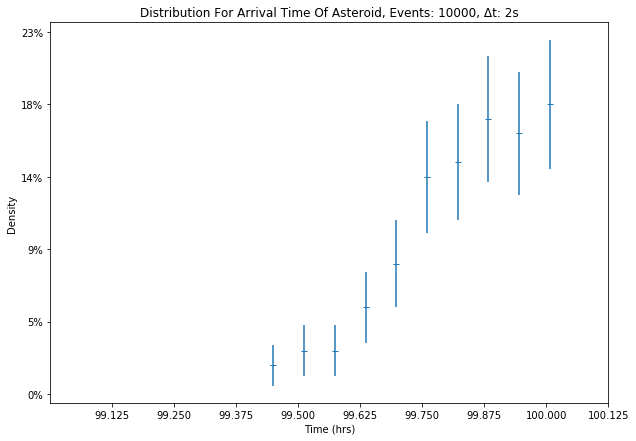

In [3]:
# your code here...
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.integrate import odeint
import scipy.stats as st
from scipy.stats import norm

Me=5.972*10**24
Re=6.3781*10**6
G=6.67384*10**-11
xi=-60*Re
yi=-80*Re
theta=60*np.pi/180
theta_sig=0.75*np.pi/180
vi=1.25*10**3
vi_x=vi*np.cos(theta)
vi_y=vi*np.sin(theta)
t=np.arange(0,5*10**5+1,1)
t_days=t/(24*3600)
def F(y,t):
    """
    This function defines the derivatives for the asteroids velocity
    
    """
    dy = [0,0,0,0]
    dy[0]=y[1]
    dy[1]= -G*Me*y[0]/(y[0]**2+y[2]**2)**(3/2)
    dy[2]=y[3]
    dy[3]= -G*Me*y[2]/(y[0]**2+y[2]**2)**(3/2)
    return dy

y0=[xi,vi_x,yi,vi_y]
y=odeint(F,y0,t)

plt.figure(1)
plt.semilogy(t_days,np.sqrt((y[:,0]/Re)**2+(y[:,2]/Re)**2),label = 'Delta R',color='darkslategray')
plt.plot(t_days,np.ones(np.size(t)),label = 'Earth',color='forestgreen')
plt.title('Distance From Earth Vs Time')
plt.ylabel('Distance ($R_e$)')
plt.xlabel('Time ($days$)')
plt.legend(loc='upper right')

plt.figure(2)
phi=np.linspace(0,2*np.pi,500)
plt.fill(np.cos(phi),np.sin(phi),label = 'Earth',color='forestgreen')
plt.plot(y[:,0]/Re,y[:,2]/Re,label = 'Orbit',color='darkslategray')
plt.axis('equal')
plt.title('Trajectory Over Time Around Earth in Y vs X')
plt.ylabel('Y_Distance ($R_e$)')
plt.xlabel('X_Distance ($R_e$)')
plt.legend(loc='upper right')
plt.show()

N_trials=np.arange(0,10000)
impacts=0
#impact=[]
t=np.arange(0,5*10**5+1,2)
#t_impact=np.zeros(np.size(t))
delta_t=2
t_cutoff=np.arange(0,3.65*10**5+1,delta_t)
t_impact=np.zeros(np.size(t_cutoff))

theta=60*np.pi/180
theta_sig=0.75*np.pi/180
alpha=theta+np.random.randn(np.size(N_trials))*theta_sig
vi_x=vi*np.cos(alpha)*np.ones(np.size(N_trials))
vi_y=vi*np.sin(alpha)*np.ones(np.size(N_trials))

for i in N_trials:
    if (i%1000) == 0:
        print(i,'trials')
    y0=[xi,vi_x[i],yi,vi_y[i]]
    y=odeint(F,y0,t_cutoff)
    r=np.sqrt((y[:,0])**2+(y[:,2])**2)
    hit=False
    j=0
    while (not hit) and (j<np.size(t_cutoff)):
        if r[j] <= Re:
            #impact = np.append(impact,N_trials[i])
            impacts += 1
            t_impact[i]=t_cutoff[j]/3600
            hit=True
        else: j += 1
            
print(np.size(N_trials), 'trials')
print(impacts, 'impacts')
impact_times=t_impact[np.nonzero(t_impact)]
print("Impact On Trial",', '.join(map(str,np.nonzero(t_impact))))
#print("Time of Impact:"), print(*(impact_times),"hours in flight",sep = ", ")
p=impacts/np.size(N_trials)
error=np.sqrt(np.size(N_trials)*p*(1-p))/np.size(N_trials)
print("Probability of impact: {:.2%}".format(p))
print("Statistical error: {:.2%}".format(error))
avg_time=np.sum(impact_times)/np.size(impact_times)
print("Average time of impact: {:.2f}".format(avg_time))
print("Standard deviation of time of impact: {:.2f}".format(np.std(impact_times)))

#xmin=min(impact_times)
#xmax=max(impact_times)
#mu,std=norm.fit(impact_times)
#x=np.linspace(xmin,xmax,np.size(impact_times))
#p=norm.pdf(x,mu,std)
#plt.figure(3)
#plt.hist(impact_times,density=True,bins = np.arange(xmin, xmax, 1),alpha=0.6,color='skyblue'
         #,label='Binomial Dist',edgecolor='mediumturquoise')
#plt.xticks(np.arange(95, 101, 2))
#plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()])

def histo(x, n_bins=10, bmin='default' , bmax='default', 
          error='sqrt',style = 'point',ymin='auto',
          weight=1.0,label=''):

    """
    This routine draws a custom histogram with errorbars
    Inputs:
        x = array of data points to be hostogrammed
        n_bins = number of bins in histogram. default=10
        b_min = value for lowest bin. default=min(x)
        b_max = value of high edge bin. default=max(x)
        error = text string of what kind of error bar. default='sqrt'
        style = string of what style. point(default) is points, bar is bar
        ymin = lower value for y-axis. default=auto
        weight = weight event counts by weight (default=1.) to
                allow normalizing 2 plots together
    Returns:
        array of length n_bins with number in each bin
        array of length n_bins with value of bin center
        array of length n_bins with values for error bars
    """
    if bmin == 'default':
        bmin = x.min()
    if bmax == 'default' :
        bmax=x.max()
    
    b_range = (bmin,bmax)
    y, bin_edges = np.histogram(x, bins=n_bins, range=b_range)
    bin_centers = 0.5*(bin_edges[1:] + bin_edges[:-1])

    y_err=np.sqrt(y)
    if error == 'sqrt' :
        y_err=y_err
    elif error == 'none':
        y_err=np.zeros(np.size(y))
    else:
        y_err=np.zeros(np.size(y))

    if ymin != 'auto':
        plt.ylim(ymin,1.1*(y.max()+y_err.max()))

    if style == 'point' :
        plt.errorbar(bin_centers, y*weight, yerr = y_err, 
                     marker='_',linestyle='None',
                    label=label)
    elif style == 'bar':
        plt.errorbar(bin_centers, y*weight, yerr = y_err ,
                     marker = '_', drawstyle = 'steps-mid',
                    label=label)
        
        
    return y, bin_centers,y_err

f = plt.figure(figsize=(10,7))
histo(impact_times,10,bmin=min(impact_times),bmax=max(impact_times),label='Impacts')
plt.xticks(np.arange(np.round_(min(impact_times)-.125),np.around(max(impact_times)+.125),.5))
plt.xticks(np.arange(99.125, 100.25, .125))
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100/impacts) for x in plt.gca().get_yticks()])
plt.title('Distribution For Arrival Time Of Asteroid, Events: {:.0f}, \u0394t: {:.0f}s'.format(np.size(N_trials),delta_t))
plt.xlabel('Time (hrs)')
plt.ylabel('Density')
plt.show()

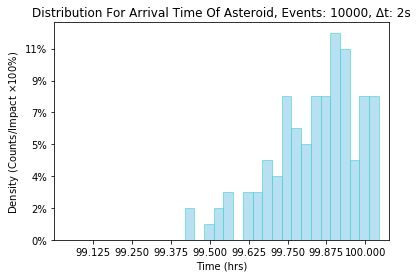

In [25]:
xmin=min(impact_times)
xmax=max(impact_times)
mu,std=norm.fit(impact_times)
x=np.linspace(xmin,xmax,np.size(impact_times))
p=norm.pdf(x,mu,std)
plt.figure(3)
plt.hist(impact_times,density=False,bins =np.arange(xmin-.03125,xmax+.03125,0.03125),alpha=0.6,color='skyblue'
         ,label='Binomial Dist',edgecolor='mediumturquoise')
plt.xticks(np.arange(np.round_(min(impact_times)-.125),np.around(max(impact_times)+.125),.125))
plt.xticks(np.arange(99.125, 100.125, .125))
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100/impacts) for x in plt.gca().get_yticks()])
plt.title('Distribution For Arrival Time Of Asteroid, Events: {:.0f}, \u0394t: {:.0f}s'.format(np.size(N_trials),delta_t))
plt.xlabel('Time (hrs)')
plt.ylabel(r'Density (Counts/Impact $\times$100%)')
plt.show()